# Personal Project : MuscleHub A/B Test

# Problem Statement:
To find out the `statistical impact of Fitness Test` before joining Memberships in a GYM

Also to find out the following stats
- Percent of visitors who filled application
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

In order to answer the above problem statement, Customers are categorised into two Groups(A & B) on basis of Fitness test

`Group A` - Customers who have visited and took Fitness Test
 
`Group B` - Customers who have visited but didn't go for Fitness test


## Step 1: Importing required Libraries to analyze data

In [88]:
# Import pandasql to work with SQL in jupyter Notebook
# Import pandas to work with tables in jupyter Notebook
import pandasql as ps
import pandas as pd

In [89]:
# Load csv data
visits = pd.read_csv('visits.csv')
fitness_tests = pd.read_csv('fitness_tests.csv')
applications = pd.read_csv('applications.csv')
purchases = pd.read_csv('purchases.csv')

## Step 2: Get your dataset

Let's get started!

Data descriptions:

- `visits` contains information about potential gym customers who have visited MuscleHub
- `fitness_tests` contains information about potential customers in "Group A", who were given a fitness test
- `applications` contains information about any potential customers (both "Group A" and "Group B") who filled out an application.  Not everyone in `visits` will have filled out an application.
- `purchases` contains information about customers who purchased a membership to MuscleHub.

In [90]:
# Examine visits here
ps.sqldf('''
SELECT *
FROM visits
LIMIT 5
''')

,first_name,last_name,email,gender,visit_date
0,Karen,Manning,Karen.Manning@gmail.com,female,5-1-17
1,Annette,Boone,AB9982@gmail.com,female,5-1-17
2,Salvador,Merritt,SalvadorMerritt12@outlook.com,male,5-1-17
3,Martha,Maxwell,Martha.Maxwell@gmail.com,female,5-1-17
4,Andre,Mayer,AndreMayer90@gmail.com,male,5-1-17


In [91]:
# Examine fitness_tests here
ps.sqldf('''
SELECT *
FROM fitness_tests
LIMIT 5
''')

,first_name,last_name,email,gender,fitness_test_date
0,Kim,Walter,KimWalter58@gmail.com,female,2017-07-03
1,Tom,Webster,TW3857@gmail.com,male,2017-07-02
2,Marcus,Bauer,Marcus.Bauer@gmail.com,male,2017-07-01
3,Roberta,Best,RB6305@hotmail.com,female,2017-07-02
4,Carrie,Francis,CF1896@hotmail.com,female,2017-07-05


In [92]:
# Examine applications here
ps.sqldf('''
SELECT *
FROM applications
LIMIT 5
''')

,first_name,last_name,email,gender,application_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-12
1,Agnes,Acevedo,AgnesAcevedo1@gmail.com,female,2017-09-29
2,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-15
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-26
4,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-14


In [93]:
# Examine purchases here
ps.sqldf('''
SELECT *
FROM purchases
LIMIT 5
''')

,first_name,last_name,email,gender,purchase_date
0,Roy,Abbott,RoyAbbott32@gmail.com,male,2017-08-18
1,Roberta,Acevedo,RA8063@gmail.com,female,2017-09-16
2,Vernon,Acosta,VAcosta1975@gmail.com,male,2017-07-20
3,Darren,Acosta,DAcosta1996@hotmail.com,male,2017-07-27
4,Dawn,Adkins,Dawn.Adkins@gmail.com,female,2017-08-24


`SQL Query to get required Table`

1. Not all visits in  `visits` occurred during the A/B test.  You'll only want to pull data where `visit_date` is on or after `7-1-17`.

2. I want to perform a series of `LEFT JOIN` commands to combine the four tables that we care about.  You'll need to perform the joins on `first_name`, `last_name`, and `email`.  Pull the following columns:


- `visits.first_name`
- `visits.last_name`
- `visits.gender`
- `visits.email`
- `visits.visit_date`
- `fitness_tests.fitness_test_date`
- `applications.application_date`
- `purchases.purchase_date`

Saving the result of this query to a variable called `df`.


In [94]:
df = ps.sqldf('''
SELECT visits.first_name,
       visits.last_name,
       visits.visit_date,
       fitness_tests.fitness_test_date,
       applications.application_date,
       purchases.purchase_date
FROM visits
LEFT JOIN fitness_tests
    ON fitness_tests.first_name = visits.first_name
    AND fitness_tests.last_name = visits.last_name
    AND fitness_tests.email = visits.email
LEFT JOIN applications
    ON applications.first_name = visits.first_name
    AND applications.last_name = visits.last_name
    AND applications.email = visits.email
LEFT JOIN purchases
    ON purchases.first_name = visits.first_name
    AND purchases.last_name = visits.last_name
    AND purchases.email = visits.email
WHERE visits.visit_date >= '7-1-17'
''')
df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date
0,Kim,Walter,7-1-17,2017-07-03,None,None
1,Tom,Webster,7-1-17,2017-07-02,None,None
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05
4,Roberta,Best,7-1-17,2017-07-02,None,None
...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None
5000,Leon,Harmon,9-9-17,2017-09-15,None,None
5001,Andy,Pratt,9-9-17,2017-09-15,None,None
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None


## Step 3: Investigate the A and B groups

##### `Import pyplot from Matplotlib to visualize insights`

In [95]:
from matplotlib import pyplot as plt

Adding a column called `ab_test_group`.  It should be `A` if `fitness_test_date` is not `None`, and `B` if `fitness_test_date` is `None`.

In [96]:
df['ab_test_group'] = df.fitness_test_date.apply(lambda x:
                                                'A' if pd.notnull(x) else 'B')
df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group
0,Kim,Walter,7-1-17,2017-07-03,None,None,A
1,Tom,Webster,7-1-17,2017-07-02,None,None,A
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A
4,Roberta,Best,7-1-17,2017-07-02,None,None,A
...,...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None,B
5000,Leon,Harmon,9-9-17,2017-09-15,None,None,A
5001,Andy,Pratt,9-9-17,2017-09-15,None,None,A
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None,B


Distribution of customers over two groups 

Start by using `groupby` to count how many users are in each `ab_test_group`.  Save the results to `ab_counts`.

In [99]:
ab_counts = df.groupby('ab_test_group').first_name.count().reset_index()
ab_counts.rename(columns={'first_name':'Count'},inplace=True)
ab_counts

,ab_test_group,Count
0,A,2504
1,B,2500


Visualize insights by creating a `pie chart`
- Using `plt.axis('equal')` so that your pie chart looks nice
- Add a legend labeling `A` and `B`
- Use `autopct` to label the percentage of each group
- Using `seaborn-paper` style for visualization

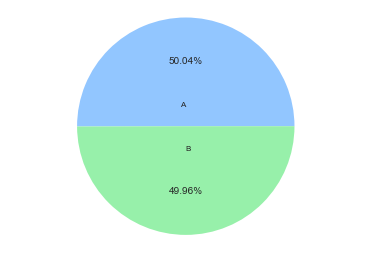

<Figure size 460.8x316.8 with 0 Axes>

In [101]:
plt.style.use('seaborn-paper')
plt.pie(ab_counts['Count'], labels=['A', 'B'], autopct='%0.2f%%',labeldistance=0.2)
plt.axis('equal')
plt.show()
plt.savefig('ab_test_pie_chart.png')


## Step 4: Who filled up application?

Sign-up process for MuscleHub has several steps:
1. Take a fitness test with a personal trainer (only Group A)
2. Fill out an application for the gym
3. Send in their payment for their first month's membership

How many people make it to Step 2, filling out an application.

Creating a new column in `df` called `is_application` which is `Filled` if `application_date` is not `None` and `Not Filled`, otherwise.

In [102]:
df['is_application'] = df.application_date.apply(lambda x: 'Filled'
                                                  if pd.notnull(x) else 'Not Filled')
df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application
0,Kim,Walter,7-1-17,2017-07-03,None,None,A,Not Filled
1,Tom,Webster,7-1-17,2017-07-02,None,None,A,Not Filled
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B,Filled
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Filled
4,Roberta,Best,7-1-17,2017-07-02,None,None,A,Not Filled
...,...,...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None,B,Not Filled
5000,Leon,Harmon,9-9-17,2017-09-15,None,None,A,Not Filled
5001,Andy,Pratt,9-9-17,2017-09-15,None,None,A,Not Filled
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None,B,Filled


Now, using `groupby`,how many people from Group A and Group B either do or don't pick up an application.  

I want to group by `ab_test_group` and `is_application`.  Saving this new DataFrame as `app_counts`

In [104]:
app_counts = df.groupby(['ab_test_group', 'is_application'])\
               .first_name.count().reset_index()
app_counts.rename(columns={'first_name':'Count'},inplace=True)
app_counts

,ab_test_group,is_application,Count
0,A,Filled,250
1,A,Not Filled,2254
2,B,Filled,325
3,B,Not Filled,2175


Calculating the percent of people in each group who complete has filled the application.

Also Pivoting the dataframe:

- The `index` is `ab_test_group`
- The `columns` are `is_application`
Saving it to the variable `app_pivot`.

In [107]:
app_pivot = app_counts.pivot(columns='is_application',
                            index='ab_test_group',
                            values='Count')\
                                .reset_index()
            
app_pivot

is_application,ab_test_group,Filled,Not Filled
0,A,250,2254
1,B,325,2175


Defining a new column called `Total`, which is the sum of `Filled` and `Not Filled`.

In [108]:
app_pivot['Total'] = app_pivot.Filled + app_pivot['Not Filled']
app_pivot

is_application,ab_test_group,Filled,Not Filled,Total
0,A,250,2254,2504
1,B,325,2175,2500


`Percent with Application`, which is equal to `Application` divided by `Total`.

In [109]:
app_pivot['Percent with Application'] = app_pivot.Filled / app_pivot.Total
app_pivot

is_application,ab_test_group,Filled,Not Filled,Total,Percent with Application
0,A,250,2254,2504,0.09984
1,B,325,2175,2500,0.13000


It looks like more people from Group B turned in an application.  Why might that be?

Is this difference statistically significant...?

Performing hypothesis Test using CHI2_Contingency to get to know the P-Value to conclude the question

`Is this result significant?`

In [51]:
from scipy.stats import chi2_contingency

contingency = [[250, 2254], [325, 2175]]
x=chi2_contingency(contingency)
x

(10.893961295282612,
 0.0009647827600722304,
 1,
 array([[ 287.72981615, 2216.27018385],
        [ 287.27018385, 2212.72981615]]))

p-Value = 0.0009647827600722304

From above result (`p-Value < 0.05`) we conclude that the difference in the percentage of applicants is `significant` among two groups.

## Step 4: Who purchased the membership?

Of those who picked up an application, how many purchased a membership?

Adding a column to `df` called `is_member` which is `Member` if `purchase_date` is not `None`, and `Not Member` otherwise.

In [110]:
df['is_member'] = df.purchase_date.apply(lambda x: 'Member' if pd.notnull(x) else 'Not Member')
df

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
0,Kim,Walter,7-1-17,2017-07-03,None,None,A,Not Filled,Not Member
1,Tom,Webster,7-1-17,2017-07-02,None,None,A,Not Filled,Not Member
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B,Filled,Member
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Filled,Member
4,Roberta,Best,7-1-17,2017-07-02,None,None,A,Not Filled,Not Member
...,...,...,...,...,...,...,...,...,...
4999,Rachel,Hensley,9-9-17,None,None,None,B,Not Filled,Not Member
5000,Leon,Harmon,9-9-17,2017-09-15,None,None,A,Not Filled,Not Member
5001,Andy,Pratt,9-9-17,2017-09-15,None,None,A,Not Filled,Not Member
5002,Ruben,Nielsen,9-9-17,None,2017-09-13,None,B,Filled,Not Member


Creating a DataFrame called `apps_Filled` the contains only people who picked up an application.

In [79]:
apps_Filled = df[df.is_application == 'Filled']
apps_Filled

,first_name,last_name,visit_date,fitness_test_date,application_date,purchase_date,ab_test_group,is_application,is_member
2,Edward,Bowen,7-1-17,None,2017-07-04,2017-07-04,B,Filled,Member
3,Marcus,Bauer,7-1-17,2017-07-01,2017-07-03,2017-07-05,A,Filled,Member
9,Salvador,Cardenas,7-1-17,2017-07-07,2017-07-06,None,A,Filled,Not Member
11,Valerie,Munoz,7-1-17,2017-07-03,2017-07-05,2017-07-06,A,Filled,Member
35,Michael,Burks,7-1-17,None,2017-07-07,2017-07-13,B,Filled,Member
...,...,...,...,...,...,...,...,...,...
4944,Frances,Kerr,9-8-17,2017-09-12,2017-09-10,2017-09-15,A,Filled,Member
4964,Raymond,Cantrell,9-9-17,None,2017-09-13,2017-09-18,B,Filled,Member
4972,Roberta,Acevedo,9-9-17,None,2017-09-15,2017-09-16,B,Filled,Member
4991,Suzanne,Humphrey,9-9-17,2017-09-09,2017-09-13,2017-09-18,A,Filled,Member


Doing a `groupby` to find out how many people in `apps_Filled` are and aren't members from each group.

Creating DataFrame as `member_pivot`.

In [80]:
member_count = apps_Filled.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()
member_pivot = member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

member_pivot['Total'] = member_pivot.Member + member_pivot['Not Member']
member_pivot['Percent Purchase'] = member_pivot.Member / member_pivot.Total
member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,50,250,0.800000
1,B,250,75,325,0.769231


It looks like people who took the fitness test were more likely to purchase a membership **if** they picked up an application.  Why might that be?

Performing hypothesis Test using CHI2_Contingency to get to know the P-Value to conclude the question

`Is this result significant?`

In [22]:
contingency = [[200, 50], [250, 75]]
chi2_contingency(contingency)

(0.61586923076923095,
 0.43258646051083327,
 1,
 array([[ 195.65217391,   54.34782609],
        [ 254.34782609,   70.65217391]]))

p-Value = 0.43258646051083327

From above result (`p-Value > 0.05`) we conclude that the difference in the percentage of members from apps_Filled is `In significant` and was random among two groups.

What we really care about is what percentage of `all visitors` purchased memberships.  

Performing a `groupby` to find out how many people in `df` are and aren't members from each group.

Saving final DataFrame as `final_member_pivot`.

In [81]:
final_member_count = df.groupby(['ab_test_group', 'is_member'])\
                 .first_name.count().reset_index()
final_member_count            
final_member_pivot = final_member_count.pivot(columns='is_member',
                                  index='ab_test_group',
                                  values='first_name')\
                           .reset_index()

final_member_pivot['Total'] = final_member_pivot.Member + final_member_pivot['Not Member']
final_member_pivot['Percent Purchase'] = final_member_pivot.Member / final_member_pivot.Total
final_member_pivot

is_member,ab_test_group,Member,Not Member,Total,Percent Purchase
0,A,200,2304,2504,0.079872
1,B,250,2250,2500,0.100000


When we only considered people who had **already picked up an application**, we saw that there was `no significant` difference in membership between Group A and Group B.

Now, when considering all people who **visit MuscleHub**, we see that there might be a significant different in memberships between Group A and Group B.

Performing Chi2_contingency test for all the people visited and people signed for memberships among two groups

In [24]:
contingency = [[200, 2304], [250, 2250]]
chi2_contingency(contingency)

(5.9491822925911562,
 0.014724114645783203,
 1,
 array([[  225.17985612,  2278.82014388],
        [  224.82014388,  2275.17985612]]))

# Conclusion:

p-Value = 0.014724114645783203

From above result (`p-Value < 0.05`) we conclude that the difference is statistically `significant` among two groups A & B.

## Step 5: Summarize the funel with a chart

Bar chart showing the difference between Group A (people who were given the fitness test) and Group B (people who were not given the fitness test) at each state of the process:
- Percent of visitors who apply
- Percent of applicants who purchase a membership
- Percent of visitors who purchase a membership

Creating plot for **each** of the three sets of percentages that you calculated in `app_pivot`, `member_pivot` and `final_member_pivot`.  

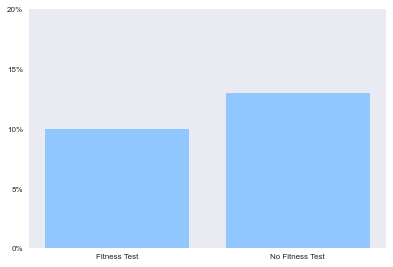

<Figure size 460.8x316.8 with 0 Axes>

In [82]:
# Percent of Visitors who Apply

plt.style.use('seaborn-dark')

ax = plt.subplot()
plt.bar(range(len(app_pivot)),
       app_pivot['Percent with Application'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_visitors_apply.png')

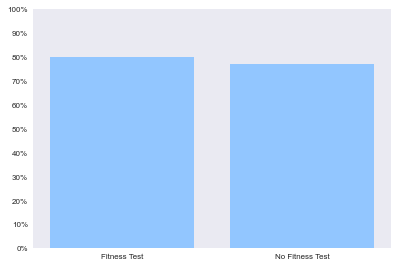

<Figure size 460.8x316.8 with 0 Axes>

In [83]:
# Percent of Applicants who Purchase

plt.style.use('seaborn-dark')
ax = plt.subplot()
plt.bar(range(len(member_pivot)),
       member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.show()
plt.savefig('percent_apply_purchase.png')

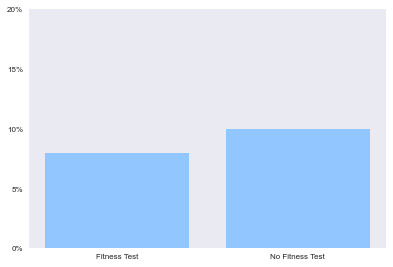

<Figure size 460.8x316.8 with 0 Axes>

In [84]:
# Percent of Visitors who Purchase
plt.style.use('seaborn-dark')
ax = plt.subplot()
plt.bar(range(len(final_member_pivot)),
       final_member_pivot['Percent Purchase'].values)
ax.set_xticks(range(len(app_pivot)))
ax.set_xticklabels(['Fitness Test', 'No Fitness Test'])
ax.set_yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.set_yticklabels(['0%', '5%', '10%', '15%', '20%'])
plt.show()
plt.savefig('percent_visitors_purchase.png')